# Gold Price Prediction using Machine Learning

In [1]:
import pandas as pd
import numpy as np


In [2]:
from sklearn.linear_model import LinearRegression
df = pd.read_csv("gold_price.csv", parse_dates=True, index_col='Date')
df.head()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481


In [10]:
df.index

DatetimeIndex(['2001-01-16', '2001-01-17', '2001-01-18', '2001-01-19',
               '2001-01-22', '2001-01-23', '2001-01-24', '2001-01-25',
               '2001-01-26', '2001-01-29',
               ...
               '2019-08-19', '2019-08-20', '2019-08-21', '2019-08-22',
               '2019-08-23', '2019-08-27', '2019-08-28', '2019-08-29',
               '2019-08-30', '2019-09-02'],
              dtype='datetime64[ns]', name='Date', length=4672, freq=None)

In [13]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
df['Return'] = df['USD (PM)'].pct_change() * 100
df['Lagged_Return'] = df.Return.shift()
df = df.dropna()
# Split the data into training and test sets
train = df[df.index.year <= 2018]
test = df[df.index.year == 2019]

# Create train and test sets for dependent and independent variables
X_train = train["Lagged_Return"].to_frame()
y_train = train["Return"]
X_test = test["Lagged_Return"].to_frame()
y_test = test["Return"]

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

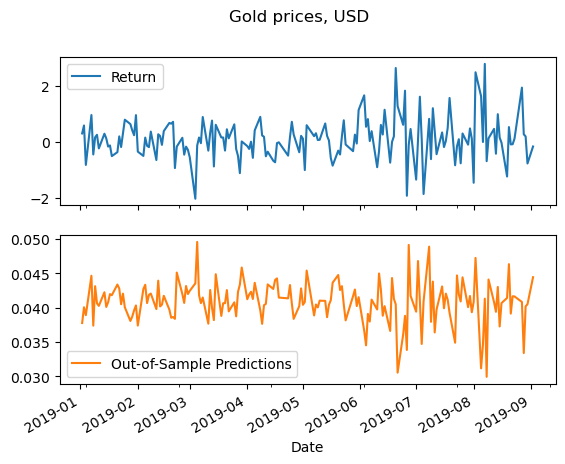

In [16]:
import matplotlib.pyplot as plt

# Assuming you already have `out_of_sample_results` DataFrame and `model` object

out_of_sample_results = y_test.to_frame()

# Add a column of "out-of-sample" predictions to that dataframe
out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)

# Plot the results
out_of_sample_results.plot(subplots=True, title='Gold prices, USD')
plt.show()  # Correct method to display the plot
